In [2]:
import re
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
def extract_mse_scores(file_path):
    # Define a regular expression pattern to match the MSE tensor values
    mse_pattern = r"MSE: tensor\(([\d\.e+-]+)(?:, device='cuda:\d')?\)"
    
    # Open file and read contents
    with open(file_path, 'r') as file:
        data = file.read()
    
    # Find matches
    mse_scores = re.findall(mse_pattern, data)
    mse_scores = [float(score) for score in mse_scores]
    
    return mse_scores

In [5]:
import os
files = [x.split('_') for x in os.listdir('output')]
files

[['19341918', 'output.log'],
 ['19365984', 'output', 'f', '2000', 'clients', '2.log'],
 ['19360472', 'output', 'f', '4000', 'clients', '2.log'],
 ['19352478', 'output', 'f', '4000.log'],
 ['19341978', 'output', 'f', '20.log'],
 ['19363499', 'output', 'f', '2555', 'clients', '2.log'],
 ['19365982', 'output', 'f', '800', 'clients', '2.log'],
 ['19342006', 'output.log'],
 ['19365979', 'output', 'f', '100', 'clients', '2.log'],
 ['19365977', 'output', 'f', '1', 'clients', '2.log'],
 ['19331300', 'output.log'],
 ['19331290', 'output.log'],
 ['19341984', 'output', 'f', '1000.log'],
 ['19331286', 'output.log'],
 ['19331304', 'output.log'],
 ['19363050', 'output', 'f', '20000', 'clients', '2.log'],
 ['19341912', 'output.log'],
 ['19366047', 'output', 'f', '20000', 'clients', '2.log'],
 ['19365978', 'output', 'f', '10', 'clients', '2.log'],
 ['19342009', 'output.log'],
 ['19331297', 'output.log'],
 ['19342005', 'output.log'],
 ['19365983', 'output', 'f', '1000', 'clients', '2.log'],
 ['19366118

In [6]:
my_files = []
for file in files:
    if int(file[0]) >= 19365977:
        my_files.append(file)
my_files.sort()
my_files

[['19365977', 'output', 'f', '1', 'clients', '2.log'],
 ['19365978', 'output', 'f', '10', 'clients', '2.log'],
 ['19365979', 'output', 'f', '100', 'clients', '2.log'],
 ['19365980', 'output', 'f', '200', 'clients', '2.log'],
 ['19365981', 'output', 'f', '400', 'clients', '2.log'],
 ['19365982', 'output', 'f', '800', 'clients', '2.log'],
 ['19365983', 'output', 'f', '1000', 'clients', '2.log'],
 ['19365984', 'output', 'f', '2000', 'clients', '2.log'],
 ['19365985', 'output', 'f', '4000', 'clients', '2.log'],
 ['19365986', 'output', 'f', '8000', 'clients', '2.log'],
 ['19365987', 'output', 'f', '10000', 'clients', '2.log'],
 ['19366003', 'output', 'f', '15000', 'clients', '2.log'],
 ['19366046', 'output', 'f', '15000', 'clients', '2.log'],
 ['19366047', 'output', 'f', '20000', 'clients', '2.log'],
 ['19366118', 'output', 'f', '22500', 'clients', '2.log'],
 ['19366119', 'output', 'f', '25000', 'clients', '2.log'],
 ['19366130', 'output', 'f', '17500', 'clients', '2.log'],
 ['19366131', 'o

In [7]:
output_logs = {}
for file in my_files:
    key = f'q={file[3]}'
    output_logs[key] = 'output/' + '_'.join(file)
    
output_logs

{'q=1': 'output/19365977_output_f_1_clients_2.log',
 'q=10': 'output/19365978_output_f_10_clients_2.log',
 'q=100': 'output/19365979_output_f_100_clients_2.log',
 'q=200': 'output/19365980_output_f_200_clients_2.log',
 'q=400': 'output/19365981_output_f_400_clients_2.log',
 'q=800': 'output/19365982_output_f_800_clients_2.log',
 'q=1000': 'output/19365983_output_f_1000_clients_2.log',
 'q=2000': 'output/19365984_output_f_2000_clients_2.log',
 'q=4000': 'output/19365985_output_f_4000_clients_2.log',
 'q=8000': 'output/19365986_output_f_8000_clients_2.log',
 'q=10000': 'output/19365987_output_f_10000_clients_2.log',
 'q=15000': 'output/19366046_output_f_15000_clients_2.log',
 'q=20000': 'output/19366131_output_f_20000_clients_2.log',
 'q=22500': 'output/19366118_output_f_22500_clients_2.log',
 'q=25000': 'output/19366119_output_f_25000_clients_2.log',
 'q=17500': 'output/19366130_output_f_17500_clients_2.log'}

In [8]:
scores = {}
for k,v in output_logs.items():
    scores[k] = extract_mse_scores(v)

In [9]:
df = pd.DataFrame.from_dict(scores, orient='index').T
df

,q=1,q=10,q=100,q=200,q=400,q=800,q=1000,q=2000,q=4000,q=8000,q=10000,q=15000,q=20000,q=22500,q=25000,q=17500
0,0.000002,0.1160,0.0120,0.0064,0.0083,0.0022,0.0007,0.0007,0.0006,0.000700,0.000400,0.000073,0.000095,NaN,NaN,0.000200
1,0.000003,0.1642,0.0307,0.0131,0.0040,0.0041,0.0073,0.0014,0.0006,0.000200,0.000200,0.000300,0.000100,NaN,NaN,0.000058
2,0.000002,0.1001,0.0182,0.0064,0.0022,0.0011,0.0004,0.0004,0.0003,0.000300,0.000057,0.000200,0.000072,NaN,NaN,0.000094
3,0.000002,0.1105,0.0069,0.0041,0.0046,0.0020,0.0030,0.0007,0.0003,0.000091,0.000200,0.000028,0.000048,NaN,NaN,0.000030
4,0.000003,0.0758,0.0201,0.0032,0.0026,0.0016,0.0003,0.0003,0.0004,0.000300,0.000200,0.000026,0.000066,NaN,NaN,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,0.000003,NaN,0.1943,0.1616,0.1472,0.0574,0.0300,0.0133,0.0053,0.001800,0.005000,0.001900,NaN,NaN,NaN,0.003900
9998,0.000002,NaN,0.2919,0.0943,0.1083,0.0556,0.0178,0.0105,0.0063,0.002600,0.004000,0.002400,NaN,NaN,NaN,0.001000
9999,0.000003,NaN,0.5675,0.0728,0.1526,0.0344,0.0177,0.0100,0.0066,0.003300,0.004500,0.002800,NaN,NaN,NaN,0.004500
10000,0.000003,NaN,0.6044,0.0931,0.1051,0.0342,0.0221,0.0088,0.0085,0.002300,0.003800,0.001700,NaN,NaN,NaN,0.001400


In [10]:
df = df[:-1]
df

,q=1,q=10,q=100,q=200,q=400,q=800,q=1000,q=2000,q=4000,q=8000,q=10000,q=15000,q=20000,q=22500,q=25000,q=17500
0,0.000002,0.1160,0.0120,0.0064,0.0083,0.0022,0.0007,0.0007,0.0006,0.000700,0.000400,0.000073,0.000095,NaN,NaN,0.000200
1,0.000003,0.1642,0.0307,0.0131,0.0040,0.0041,0.0073,0.0014,0.0006,0.000200,0.000200,0.000300,0.000100,NaN,NaN,0.000058
2,0.000002,0.1001,0.0182,0.0064,0.0022,0.0011,0.0004,0.0004,0.0003,0.000300,0.000057,0.000200,0.000072,NaN,NaN,0.000094
3,0.000002,0.1105,0.0069,0.0041,0.0046,0.0020,0.0030,0.0007,0.0003,0.000091,0.000200,0.000028,0.000048,NaN,NaN,0.000030
4,0.000003,0.0758,0.0201,0.0032,0.0026,0.0016,0.0003,0.0003,0.0004,0.000300,0.000200,0.000026,0.000066,NaN,NaN,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,0.000002,NaN,0.2559,0.1479,0.0679,0.0455,0.0174,0.0101,0.0061,0.003900,0.005500,0.002500,NaN,NaN,NaN,0.001300
9997,0.000003,NaN,0.1943,0.1616,0.1472,0.0574,0.0300,0.0133,0.0053,0.001800,0.005000,0.001900,NaN,NaN,NaN,0.003900
9998,0.000002,NaN,0.2919,0.0943,0.1083,0.0556,0.0178,0.0105,0.0063,0.002600,0.004000,0.002400,NaN,NaN,NaN,0.001000
9999,0.000003,NaN,0.5675,0.0728,0.1526,0.0344,0.0177,0.0100,0.0066,0.003300,0.004500,0.002800,NaN,NaN,NaN,0.004500


In [11]:
df = df.reset_index()
df

,index,q=1,q=10,q=100,q=200,q=400,q=800,q=1000,q=2000,q=4000,q=8000,q=10000,q=15000,q=20000,q=22500,q=25000,q=17500
0,0,0.000002,0.1160,0.0120,0.0064,0.0083,0.0022,0.0007,0.0007,0.0006,0.000700,0.000400,0.000073,0.000095,NaN,NaN,0.000200
1,1,0.000003,0.1642,0.0307,0.0131,0.0040,0.0041,0.0073,0.0014,0.0006,0.000200,0.000200,0.000300,0.000100,NaN,NaN,0.000058
2,2,0.000002,0.1001,0.0182,0.0064,0.0022,0.0011,0.0004,0.0004,0.0003,0.000300,0.000057,0.000200,0.000072,NaN,NaN,0.000094
3,3,0.000002,0.1105,0.0069,0.0041,0.0046,0.0020,0.0030,0.0007,0.0003,0.000091,0.000200,0.000028,0.000048,NaN,NaN,0.000030
4,4,0.000003,0.0758,0.0201,0.0032,0.0026,0.0016,0.0003,0.0003,0.0004,0.000300,0.000200,0.000026,0.000066,NaN,NaN,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,0.000002,NaN,0.2559,0.1479,0.0679,0.0455,0.0174,0.0101,0.0061,0.003900,0.005500,0.002500,NaN,NaN,NaN,0.001300
9997,9997,0.000003,NaN,0.1943,0.1616,0.1472,0.0574,0.0300,0.0133,0.0053,0.001800,0.005000,0.001900,NaN,NaN,NaN,0.003900
9998,9998,0.000002,NaN,0.2919,0.0943,0.1083,0.0556,0.0178,0.0105,0.0063,0.002600,0.004000,0.002400,NaN,NaN,NaN,0.001000
9999,9999,0.000003,NaN,0.5675,0.0728,0.1526,0.0344,0.0177,0.0100,0.0066,0.003300,0.004500,0.002800,NaN,NaN,NaN,0.004500


In [12]:
df.rename(columns={'index': 'Round'}, inplace=True)
df

,Round,q=1,q=10,q=100,q=200,q=400,q=800,q=1000,q=2000,q=4000,q=8000,q=10000,q=15000,q=20000,q=22500,q=25000,q=17500
0,0,0.000002,0.1160,0.0120,0.0064,0.0083,0.0022,0.0007,0.0007,0.0006,0.000700,0.000400,0.000073,0.000095,NaN,NaN,0.000200
1,1,0.000003,0.1642,0.0307,0.0131,0.0040,0.0041,0.0073,0.0014,0.0006,0.000200,0.000200,0.000300,0.000100,NaN,NaN,0.000058
2,2,0.000002,0.1001,0.0182,0.0064,0.0022,0.0011,0.0004,0.0004,0.0003,0.000300,0.000057,0.000200,0.000072,NaN,NaN,0.000094
3,3,0.000002,0.1105,0.0069,0.0041,0.0046,0.0020,0.0030,0.0007,0.0003,0.000091,0.000200,0.000028,0.000048,NaN,NaN,0.000030
4,4,0.000003,0.0758,0.0201,0.0032,0.0026,0.0016,0.0003,0.0003,0.0004,0.000300,0.000200,0.000026,0.000066,NaN,NaN,0.000049
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,9996,0.000002,NaN,0.2559,0.1479,0.0679,0.0455,0.0174,0.0101,0.0061,0.003900,0.005500,0.002500,NaN,NaN,NaN,0.001300
9997,9997,0.000003,NaN,0.1943,0.1616,0.1472,0.0574,0.0300,0.0133,0.0053,0.001800,0.005000,0.001900,NaN,NaN,NaN,0.003900
9998,9998,0.000002,NaN,0.2919,0.0943,0.1083,0.0556,0.0178,0.0105,0.0063,0.002600,0.004000,0.002400,NaN,NaN,NaN,0.001000
9999,9999,0.000003,NaN,0.5675,0.0728,0.1526,0.0344,0.0177,0.0100,0.0066,0.003300,0.004500,0.002800,NaN,NaN,NaN,0.004500


In [13]:
# Melt the DataFrame so that 'q' values become a column and the values are in another column
df_melted = df.melt(id_vars='Round', var_name='q', value_name='MSE')

df_melted_filtered = df_melted[df_melted['q'] != 'q=10']
df_melted_filtered = df_melted_filtered[df_melted_filtered['q'] != 'q=1']
df_melted_filtered = df_melted_filtered[df_melted_filtered['q'] != 'q=8000']
df_melted_filtered = df_melted_filtered[df_melted_filtered['q'] != 'q=15000']

df_melted_filtered.dropna(inplace=True)

In [14]:
# rolling average of MSE take the plot smoother and more readable
rolling_window = 250
df_melted_filtered['MSE_MA'] = df_melted_filtered.groupby('q')['MSE'].transform(lambda x: x.rolling(window=rolling_window, min_periods=1).mean())

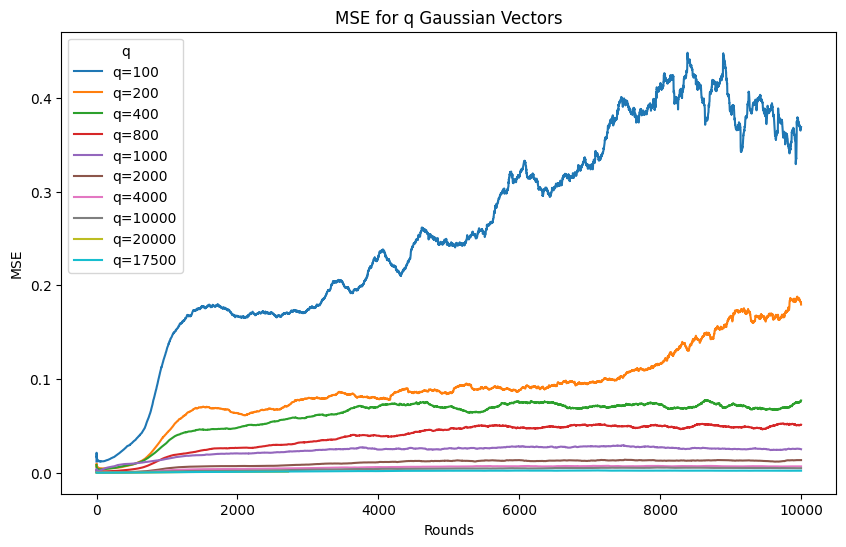

In [15]:
# Plot with seaborn, 'index' (rounds) on x-axis, 'MSE' on y-axis, and 'q' for hue (separate lines)
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted_filtered, x='Round', y='MSE_MA', hue='q')

# Add labels and title
plt.xlabel('Rounds')
plt.ylabel('MSE')
plt.title('MSE for q Gaussian Vectors')

# Show the plot
plt.show()

In [16]:
def extract_eval_acc(file_path):
    # Regex to find eval_acc values
    pattern = r"eval_acc=(\d+\.\d+)"
    
    # Open file and read contents
    with open(file_path, 'r') as file:
        log_text = file.read()
    
    # Find all matches in the log text
    matches = re.findall(pattern, log_text)
    
    # Convert matches to float, skipping the first occurrence
    eval_acc_values = [float(acc) for acc in matches[1:]] if len(matches) > 1 else []
    
    return eval_acc_values

In [17]:
acc = {}
for k,v in output_logs.items():
    acc[k] = extract_eval_acc(v)
    
acc

{'q=1': [0.097,
  0.096,
  0.096,
  0.099,
  0.099,
  0.1,
  0.1,
  0.099,
  0.099,
  0.097,
  0.097,
  0.1,
  0.1,
  0.099,
  0.099,
  0.1,
  0.1,
  0.099,
  0.099,
  0.099,
  0.099,
  0.097,
  0.097,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.1,
  0.1,
  0.1,
  0.1,
  0.097,
  0.097,
  0.098,
  0.098,
  0.099,
  0.099,
  0.099,
  0.099,
  0.096,
  0.096,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.097,
  0.097,
  0.099,
  0.099,
  0.098,
  0.098,
  0.097,
  0.097,
  0.097,
  0.097,
  0.1,
  0.1,
  0.099,
  0.099,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.098,
  0.097,
  0.097,
  0.099,
  0.099,
  0.098,
  0.098,
  0.099,
  0.099,
  0.098,
  0.098,
  0.099,
  0.099,
  0.097,
  0.097,
  0.097,
  0.097,
  0.098,
  0.098,
  0.099,
  0.099,
  0.099,
  0.099,
  0.099,
  0.099,
  0.1,
  0.1,
  0.101,
  0.101,
  0.099,
  0.099,
  0.1,
  0.1,
  0.099,
  0.099,
  0.099,
  0.099,
  0.101,
  0.101,
  0.1,
  0.1,
  0.099,
  0

In [18]:
df_acc = pd.DataFrame.from_dict(acc, orient='index').T
df_acc.head()

,q=1,q=10,q=100,q=200,q=400,q=800,q=1000,q=2000,q=4000,q=8000,q=10000,q=15000,q=20000,q=22500,q=25000,q=17500
0,0.097,0.103,0.116,0.103,0.109,0.112,0.104,0.110,0.098,0.099,0.105,0.113,0.099,NaN,NaN,0.106
1,0.096,0.119,0.115,0.109,0.113,0.118,0.101,0.118,0.098,0.107,0.127,0.109,0.115,NaN,NaN,0.109
2,0.096,0.119,0.115,0.109,0.113,0.118,0.101,0.118,0.098,0.107,0.127,0.109,0.115,NaN,NaN,0.109
3,0.099,0.128,0.109,0.107,0.122,0.108,0.101,0.127,0.102,0.110,0.135,0.103,0.125,NaN,NaN,0.107
4,0.099,0.128,0.109,0.107,0.122,0.108,0.101,0.127,0.102,0.110,0.135,0.103,0.125,NaN,NaN,0.107


In [19]:
df_acc.reset_index(inplace=True)
df_acc.rename(columns={'index': 'Round'}, inplace=True)
df_acc['Round'] *= 10
df_acc

,Round,q=1,q=10,q=100,q=200,q=400,q=800,q=1000,q=2000,q=4000,q=8000,q=10000,q=15000,q=20000,q=22500,q=25000,q=17500
0,0,0.097,0.103,0.116,0.103,0.109,0.112,0.104,0.110,0.098,0.099,0.105,0.113,0.099,NaN,NaN,0.106
1,10,0.096,0.119,0.115,0.109,0.113,0.118,0.101,0.118,0.098,0.107,0.127,0.109,0.115,NaN,NaN,0.109
2,20,0.096,0.119,0.115,0.109,0.113,0.118,0.101,0.118,0.098,0.107,0.127,0.109,0.115,NaN,NaN,0.109
3,30,0.099,0.128,0.109,0.107,0.122,0.108,0.101,0.127,0.102,0.110,0.135,0.103,0.125,NaN,NaN,0.107
4,40,0.099,0.128,0.109,0.107,0.122,0.108,0.101,0.127,0.102,0.110,0.135,0.103,0.125,NaN,NaN,0.107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,9940,0.098,0.101,0.198,0.358,0.450,0.486,0.422,0.490,0.499,0.487,0.493,0.493,NaN,NaN,NaN,0.501
995,9950,0.098,0.101,0.196,0.358,0.448,0.491,0.433,0.502,0.501,0.486,0.491,0.473,NaN,NaN,NaN,0.508
996,9960,0.098,0.101,0.196,0.358,0.448,0.491,0.433,0.502,0.501,0.486,0.491,0.473,NaN,NaN,NaN,0.508
997,9970,0.099,0.101,0.216,0.359,0.446,0.476,0.420,0.502,0.495,0.485,0.477,0.486,NaN,NaN,NaN,0.506


In [33]:
row1 = 252
df_acc.iloc[row1]

Round      2520.000
q=1           0.098
q=10          0.101
q=100         0.329
q=200         0.339
q=400         0.334
q=800         0.330
q=1000        0.277
q=2000        0.341
q=4000        0.353
q=8000        0.314
q=10000       0.312
q=15000       0.337
q=20000       0.350
q=22500         NaN
q=25000         NaN
q=17500       0.325
Name: 252, dtype: float64

In [34]:
row_from_df1 = df.iloc[row1*10]
row_from_df2 = df_acc.iloc[row1]

# Create a new DataFrame from the extracted rows
new_df = pd.DataFrame({'MSE': row_from_df1, 'Acc': row_from_df2})

new_df


,MSE,Acc
Round,2520.000000,2520.000
q=1,0.000002,0.098
q=10,NaN,0.101
q=100,0.203000,0.329
q=200,0.058000,0.339
q=400,0.046700,0.334
q=800,0.022000,0.330
q=1000,0.026000,0.277
q=2000,0.008700,0.341
q=4000,0.005000,0.353


In [35]:
new_df.drop(index=['Round', 'q=1', 'q=10', 'q=15000'], inplace=True)
new_df

,MSE,Acc
q=100,0.2030,0.329
q=200,0.0580,0.339
q=400,0.0467,0.334
q=800,0.0220,0.330
q=1000,0.0260,0.277
q=2000,0.0087,0.341
q=4000,0.0050,0.353
q=8000,0.0023,0.314
q=10000,0.0026,0.312
q=20000,0.0015,0.350


In [36]:
row2 = 477
row3 = 777
row1, row2, row3

(252, 477, 777)

In [37]:
row2_from_df1 = df.iloc[row2*10]
row2_from_df2 = df_acc.iloc[row2]

new_df2 = pd.DataFrame({'MSE': row2_from_df1, 'Acc': row2_from_df2})

new_df2.drop(index=['Round', 'q=1', 'q=10', 'q=15000'], inplace=True)

new_df2

,MSE,Acc
q=100,0.1657,0.343
q=200,0.0765,0.405
q=400,0.0962,0.401
q=800,0.0418,0.414
q=1000,0.0504,0.359
q=2000,0.0104,0.427
q=4000,0.0078,0.422
q=8000,0.0032,0.418
q=10000,0.0046,0.411
q=20000,NaN,NaN


In [38]:
row3_from_df1 = df.iloc[row3*10]
row3_from_df2 = df_acc.iloc[row3]

new_df3 = pd.DataFrame({'MSE': row3_from_df1, 'Acc': row3_from_df2})

new_df3.drop(index=['Round', 'q=1', 'q=10', 'q=15000'], inplace=True)

new_df3

,MSE,Acc
q=100,0.2496,0.279
q=200,0.1049,0.410
q=400,0.0599,0.448
q=800,0.0465,0.460
q=1000,0.0198,0.398
q=2000,0.0123,0.471
q=4000,0.0108,0.471
q=8000,0.0039,0.456
q=10000,0.0067,0.458
q=20000,NaN,NaN


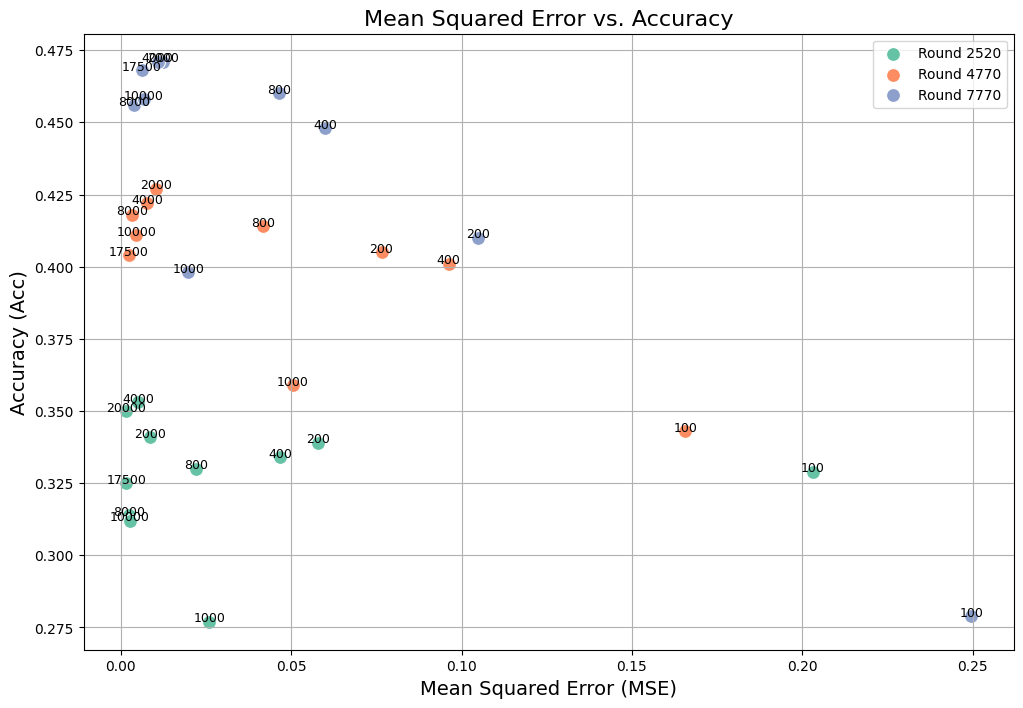

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a custom color palette
colors = sns.color_palette("Set2", n_colors=3)

plt.figure(figsize=(12, 8))

# Plot the first DataFrame
sns.scatterplot(data=new_df, x='MSE', y='Acc', color=colors[0], label=f'Round {row1*10}', s=100)

# Annotate the first DataFrame
for i in range(len(new_df)):
    plt.annotate(
        new_df.index[i].replace('q=', ''),  # Remove 'q=' for labeling
        (new_df['MSE'].iloc[i], new_df['Acc'].iloc[i]),
        ha='center',  # Center alignment
        fontsize=9  # Adjust font size for better readability
    )

# Plot the second DataFrame
sns.scatterplot(data=new_df2, x='MSE', y='Acc', color=colors[1], label=f'Round {row2*10}', s=100)

# Annotate the second DataFrame
for i in range(len(new_df2)):
    plt.annotate(
        new_df2.index[i].replace('q=', ''),  # Remove 'q=' for labeling
        (new_df2['MSE'].iloc[i], new_df2['Acc'].iloc[i]),
        ha='center',
        fontsize=9
    )

# Plot the third DataFrame
sns.scatterplot(data=new_df3, x='MSE', y='Acc', color=colors[2], label=f'Round {row3*10}', s=100)

# Annotate the third DataFrame
for i in range(len(new_df3)):
    plt.annotate(
        new_df3.index[i].replace('q=', ''),  # Remove 'q=' for labeling
        (new_df3['MSE'].iloc[i], new_df3['Acc'].iloc[i]),
        ha='center',
        fontsize=9
    )

# Aesthetic improvements
plt.title('Mean Squared Error vs. Accuracy', fontsize=16)
plt.xlabel('Mean Squared Error (MSE)', fontsize=14)
plt.ylabel('Accuracy (Acc)', fontsize=14)
plt.grid(True)  # Show grid
plt.legend()  # Add legend
plt.show()
